In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
diabetes_df=pd.read_csv("diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking Null Values

In [20]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Checking Duplicate Values

In [21]:
diabetes_df.duplicated().sum()

0

# Data Visualization

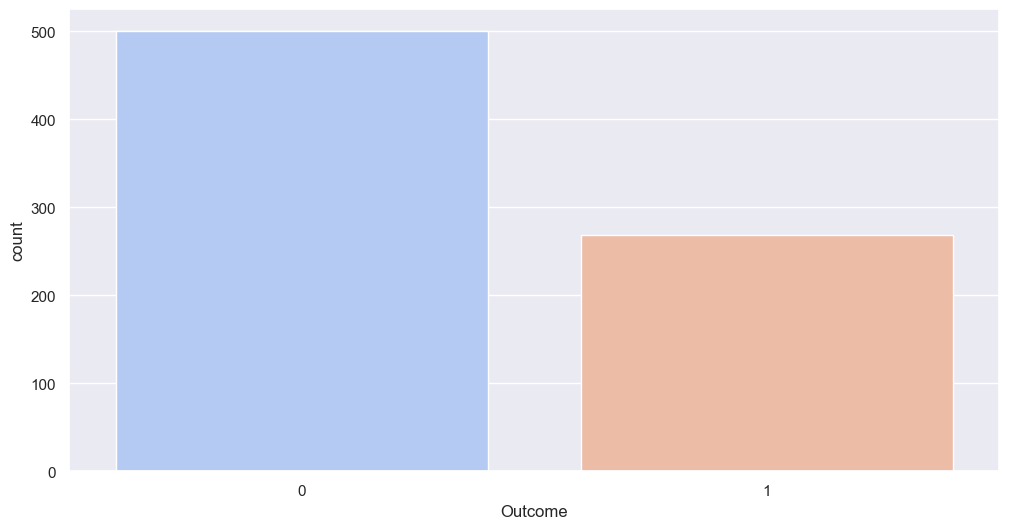

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x="Outcome", data=diabetes_df, palette="coolwarm")
plt.show()

# Observing Outliers

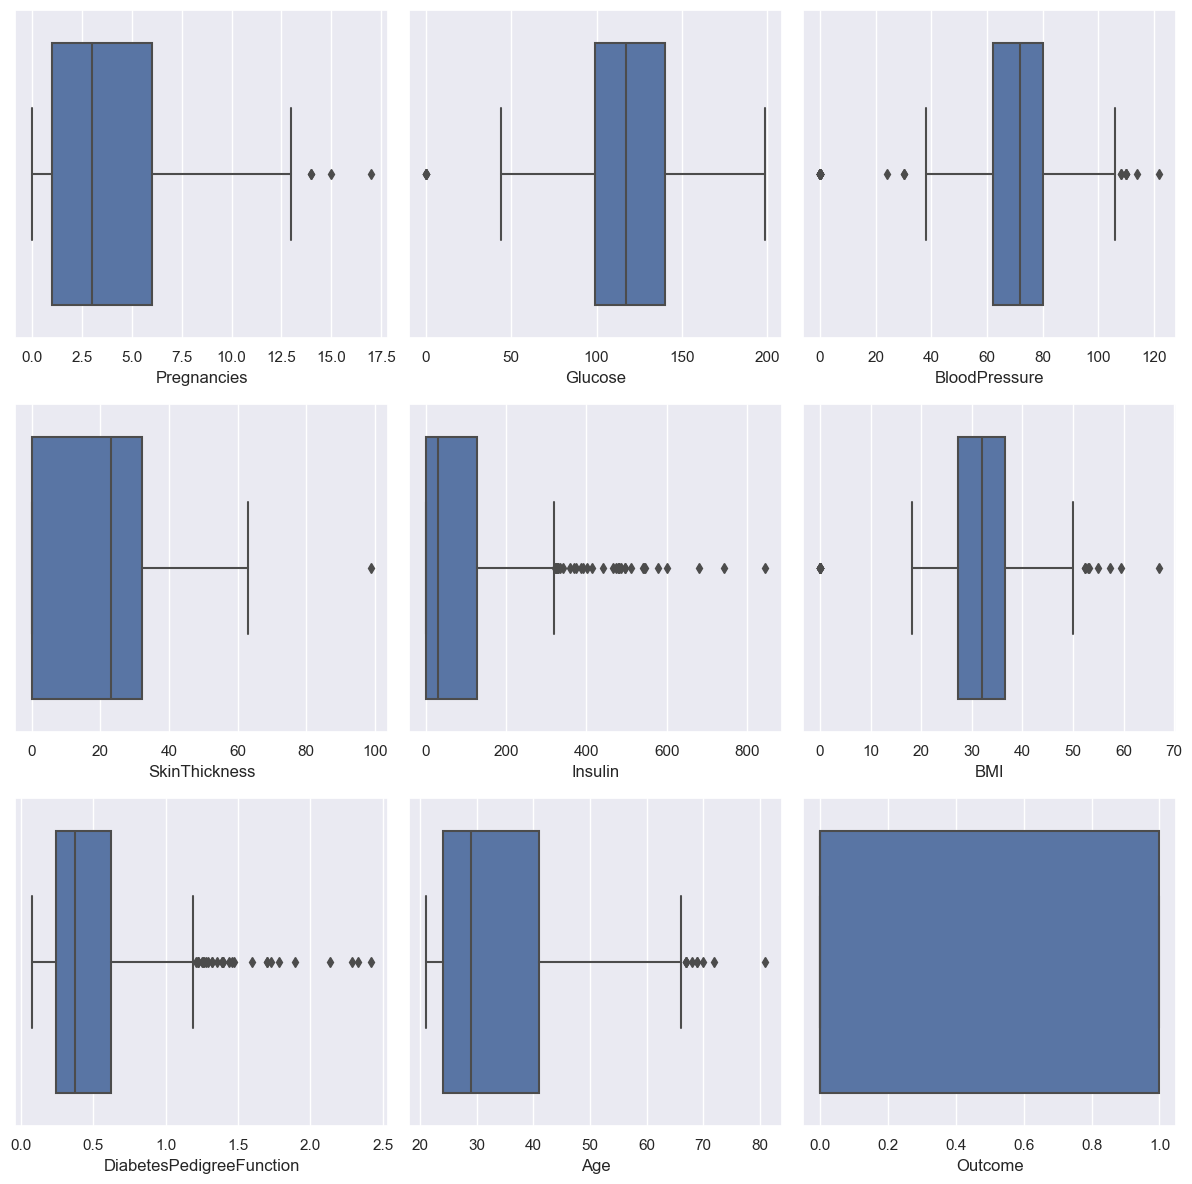

In [46]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                         'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3, 3, i + 1)  # Create a subplot in a 3x3 grid
    sns.boxplot(x=col, data=diabetes_df)  # Create a box plot for the current column

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

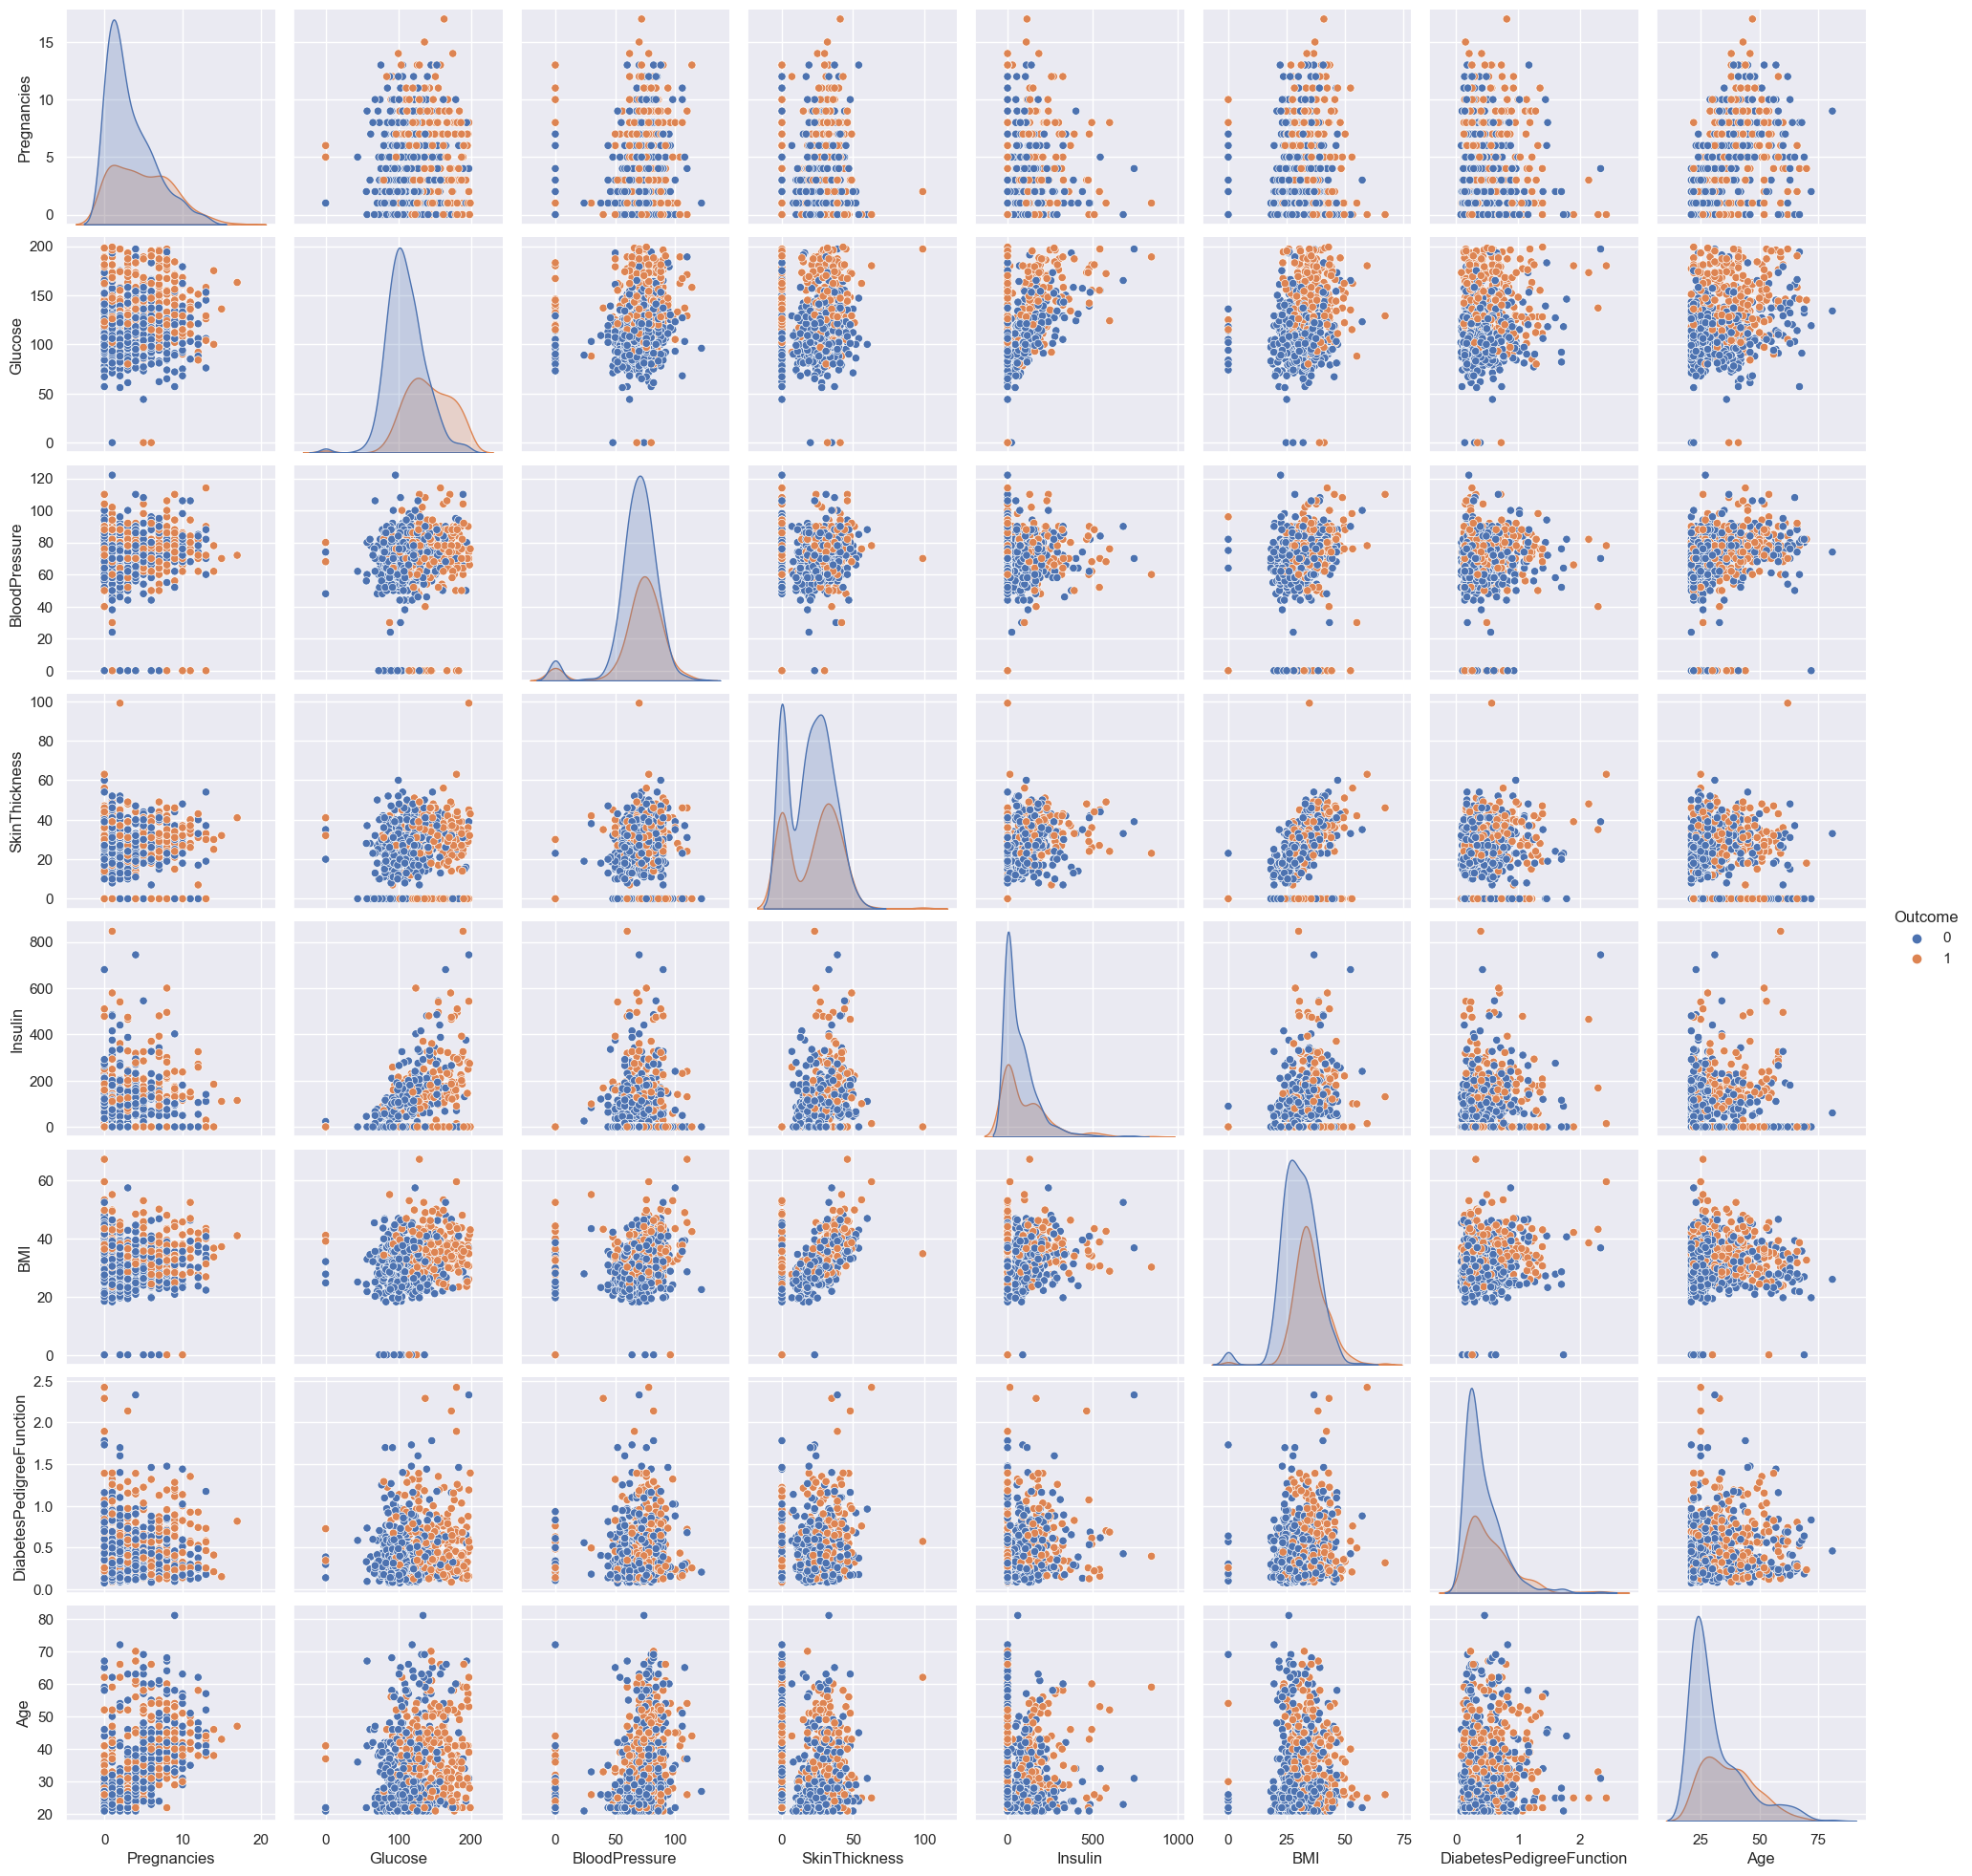

In [42]:
sns.pairplot(data=diabetes_df,hue="Outcome")
plt.show()

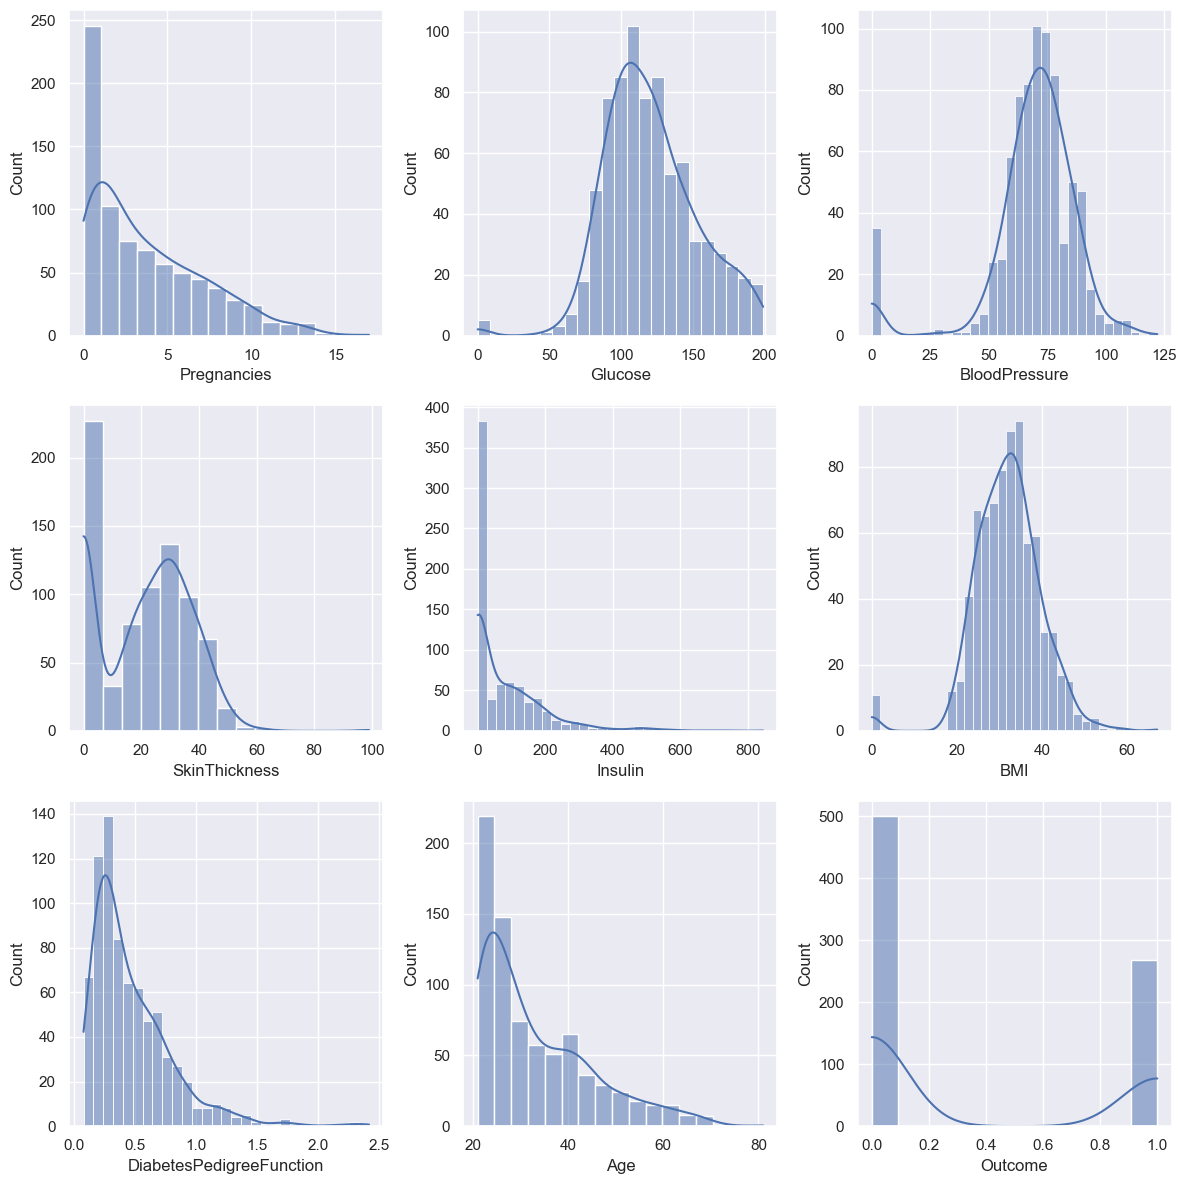

In [47]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                         'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3, 3, i + 1)  # Create a subplot in a 3x3 grid
    sns.histplot(x=col, data=diabetes_df, kde=True)  # Create a box plot for the current column

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

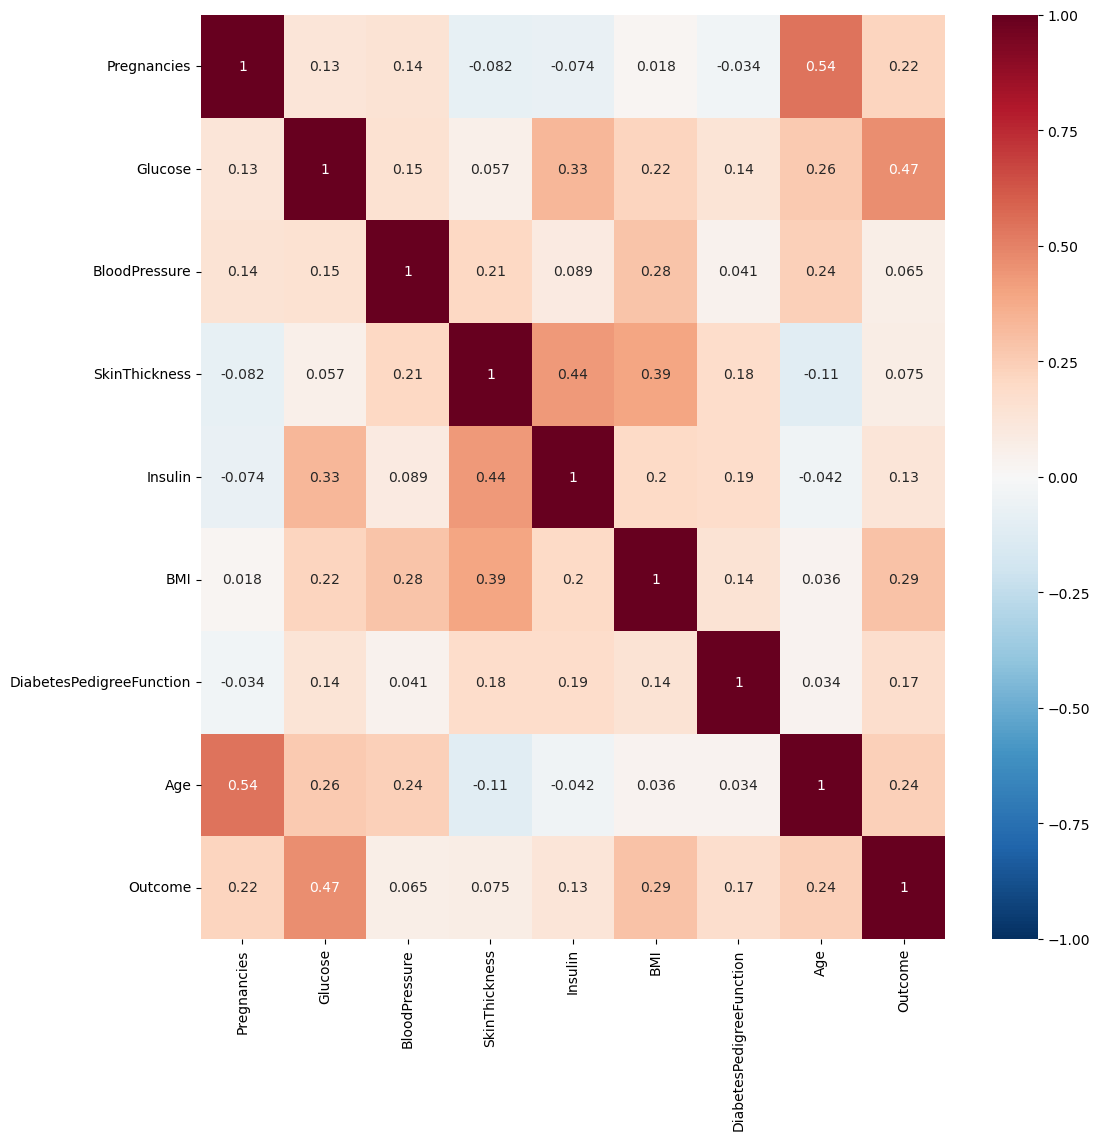

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(diabetes_df.corr(), annot=True, cmap="RdBu_r", vmin=-1.0, center=0)
plt.show()

# Standard Scaling and Label Encoding

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
X=pd.DataFrame(sc.fit_transform(diabetes_df.drop(["Outcome"],axis=1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [14]:
y=diabetes_df["Outcome"]

In [15]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Using KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

test_scores=[]
train_scores=[]

for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [27]:
max_train_score=max(train_scores)
train_scores_index=[i for i, v in enumerate(train_scores)if v== max_train_score]
print("Max Train score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1,train_scores_index))))

Max Train score 100.0 % and k = [1]


In [28]:
max_test_score=max(test_scores)
test_scores_index=[i for i, v in enumerate(test_scores)if v== max_test_score]
print("Max Test score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1,test_scores_index))))

Max Test score 77.92207792207793 % and k = [13]


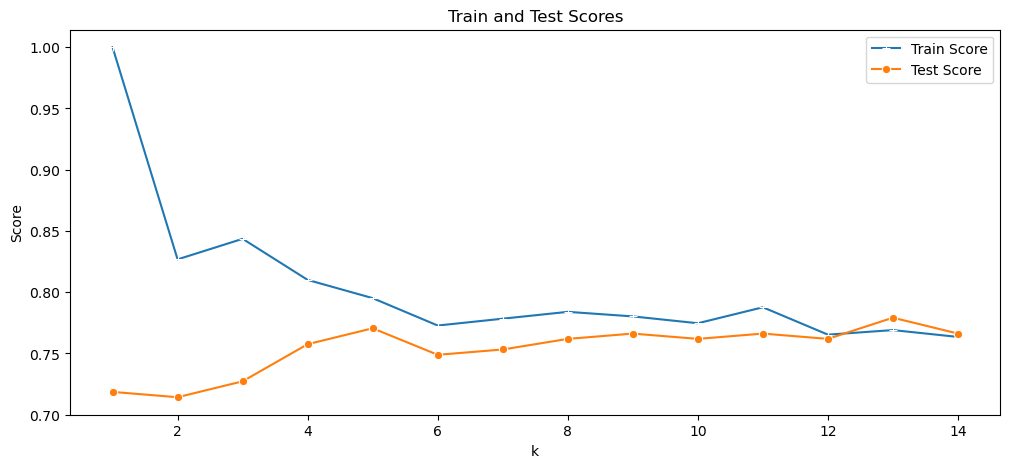

In [30]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker="+", label="Train Score")
p = sns.lineplot(x=range(1, 15), y=test_scores, marker="o", label="Test Score")
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Train and Test Scores')
plt.legend()
plt.show()

In [37]:
knn=KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7792207792207793

# Predictions and Evaluations

In [33]:
pred=knn.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[141  16]
 [ 35  39]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

